In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import jalali_pandas
from persiantools.jdatetime import JalaliDate, JalaliDateTime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('vaccine_clean_5.csv')
df.head()

,code,تاریخ پذیرش,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,سینا-نام واکسن مرحله 1,سینا-نام واکسن مرحله 2,سینا-نام واکسن مرحله 3,...,Underlying_disease,labels,vaccine_01,vaccine_02,vaccine_03,vac_1,vac_2,vac_3,vac_sequence,فوت شده
0,982722885,1401/04/28,62,2,0,1,0,0,0,0,...,0,4,NaN,NaN,NaN,0,0,0,0,0
1,1060818078,1400/11/03,87,2,0,0,1,0,0,0,...,0,1,NaN,NaN,NaN,0,0,0,0,0
2,890540012,1400/05/04,21,2,0,1,0,0,0,0,...,0,4,NaN,NaN,NaN,0,0,0,0,0
3,749844469,1400/06/05,33,0,0,0,1,0,0,0,...,0,1,NaN,NaN,NaN,0,0,0,0,0
4,937231959,1400/06/16,66,1,0,0,0,0,0,0,...,3,2,NaN,NaN,NaN,0,0,0,0,0


In [3]:
data=df[['labels','vac_1','vac_2','vac_3','vac_sequence','فوت شده']]

In [4]:
data.head(7)

,labels,vac_1,vac_2,vac_3,vac_sequence,فوت شده
0,4,0,0,0,0,0
1,1,0,0,0,0,0
2,4,0,0,0,0,0
3,1,0,0,0,0,0
4,2,0,0,0,0,0
5,3,0,0,0,0,1
6,2,0,0,0,0,1


In [5]:
data['فوت شده'].value_counts()

0    29304
1     5865
Name: فوت شده, dtype: int64

In [6]:
X=data.drop(['فوت شده'],axis=1)
y=data['فوت شده']

In [7]:
# X_train, X_test= train_test_split(data, test_size=0.2)
# SS=StandardScaler()
# trainx = pd.DataFrame(SS.fit_transform(X_train),columns = X_train.columns)
# testx = pd.DataFrame(SS.fit_transform(X_test),columns = X_test.columns)
# trainy=trainx['فوت شده']
# testy=testx['فوت شده']
# trainx.drop(['فوت شده'],axis=1,inplace=True)
# testx.drop(['فوت شده'],axis=1,inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state =123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,test_size=0.5,random_state =123)

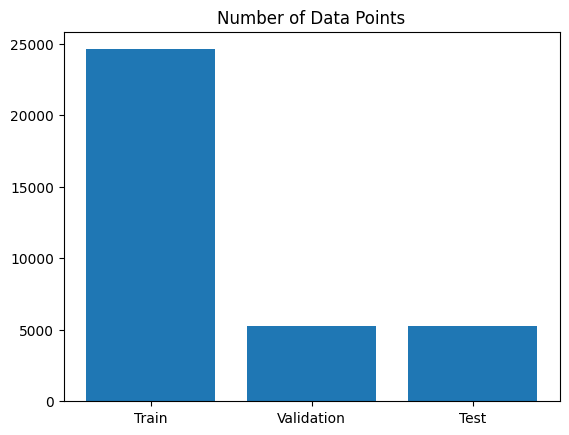

In [8]:
train_count = X_train.shape[0]
validation_count = X_valid.shape[0]
test_count = X_test.shape[0]

# دسته‌ها
categories = ['Train', 'Validation', 'Test']

# تعداد داده‌ها
counts = [train_count, validation_count, test_count]

# رسم نمودار میله‌ای
plt.bar(categories, counts)
plt.title('Number of Data Points')
plt.show()

In [9]:
selected_models = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'KNeighborsClassifier',
                   'GaussianNB', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'ExtraTreesClassifier',
                   'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

# Create and fit the LazyClassifier with the selected models
classify = [cls for cls in lazypredict.Supervised.CLASSIFIERS if cls[0] in selected_models]
cls = LazyClassifier(verbose=0,classifiers=classify,custom_metric=None)
models, predictions = cls.fit(X_train, X_valid, y_train, y_valid)


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


In [10]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.90,0.79,0.79,0.90,0.36
XGBClassifier,0.91,0.79,0.79,0.90,0.63
DecisionTreeClassifier,0.91,0.79,0.79,0.90,0.02
RandomForestClassifier,0.91,0.79,0.79,0.90,0.47
LGBMClassifier,0.91,0.79,0.79,0.90,0.19
ExtraTreesClassifier,0.91,0.79,0.79,0.90,0.45
AdaBoostClassifier,0.91,0.79,0.79,0.90,0.45
SVC,0.91,0.78,0.78,0.90,7.97
GaussianNB,0.73,0.67,0.67,0.75,0.02


In [8]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion= 'entropy',max_depth= 10, max_features= 'auto', min_samples_split= 5, n_estimators= 50)
RF.fit(X_train,y_train)
ypred=RF.predict(X_valid)

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


print('Accuracy: ' ,round(accuracy_score(y_valid,ypred),2))
print('ROC AUC : ' ,round(roc_auc_score(y_valid,ypred),2))

Accuracy:  0.91
ROC AUC :  0.79


In [10]:
ypred_t=RF.predict(X_test)


print('Accuracy: ' ,round(accuracy_score(y_test,ypred_t),2))
print('ROC AUC : ' ,round(roc_auc_score(y_test,ypred_t),2))

Accuracy:  0.91
ROC AUC :  0.78


In [11]:
RF.feature_importances_

array([0.85161303, 0.01794145, 0.01836239, 0.03461769, 0.07746544])

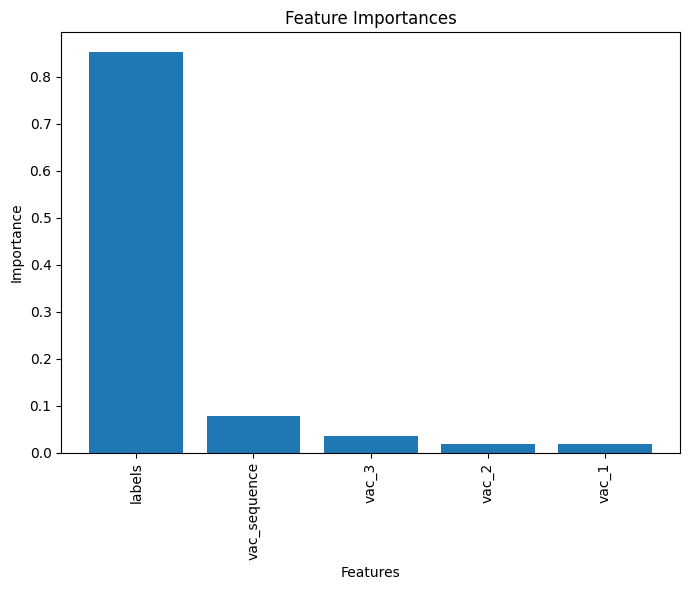

In [12]:
importances = RF.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace 'data' with your dataset or provide feature names separately

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances as a bar plot
plt.figure(figsize=(7, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

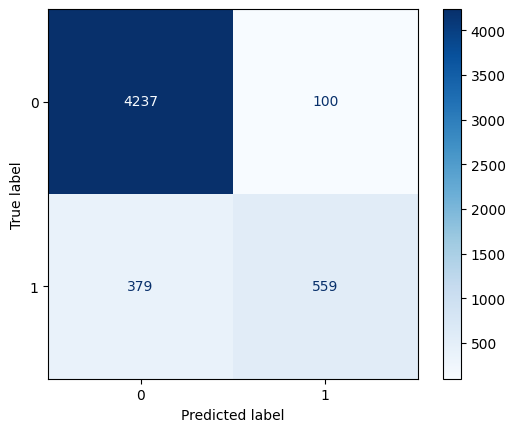

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_valid, y_valid,cmap='Blues')  
plt.show()

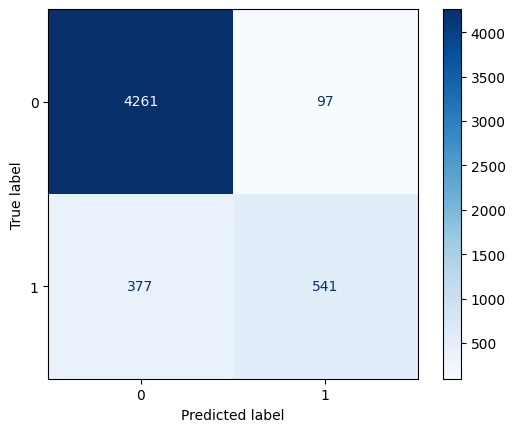

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, X_test, y_test,cmap='Blues')  
plt.show()

>1, train: 0.786, test: 0.784
>2, train: 0.786, test: 0.784
>3, train: 0.786, test: 0.784
>4, train: 0.786, test: 0.784
>5, train: 0.786, test: 0.784
>6, train: 0.786, test: 0.784
>7, train: 0.786, test: 0.784
>8, train: 0.786, test: 0.784
>9, train: 0.786, test: 0.784
>10, train: 0.786, test: 0.784
>11, train: 0.786, test: 0.784
>12, train: 0.786, test: 0.784
>13, train: 0.786, test: 0.784
>14, train: 0.786, test: 0.784
>15, train: 0.786, test: 0.784
>16, train: 0.786, test: 0.784
>17, train: 0.786, test: 0.784
>18, train: 0.786, test: 0.784
>19, train: 0.786, test: 0.784
>20, train: 0.786, test: 0.784


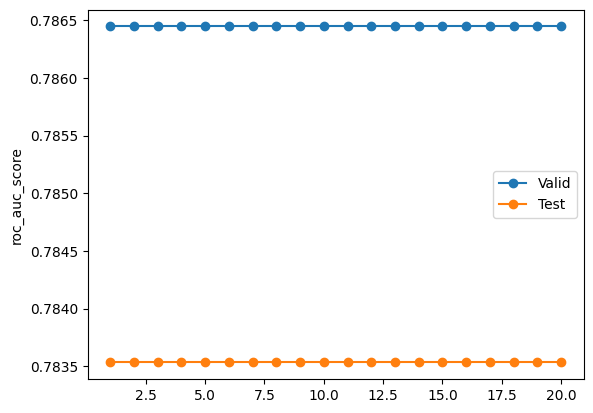

In [15]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    train_yhat = RF.predict(X_valid)
    train_acc = roc_auc_score(y_valid, train_yhat)
    train_scores.append(train_acc)
     # evaluate on the test dataset

    test_yhat = RF.predict(X_test)
    test_acc = roc_auc_score(y_test, test_yhat)
    test_scores.append(test_acc)
     # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Valid')
plt.plot(values, test_scores, '-o', label='Test')
plt.ylabel('roc_auc_score')
plt.legend()
plt.show()

In [16]:
ypred_p=RF.predict_proba(X_test)

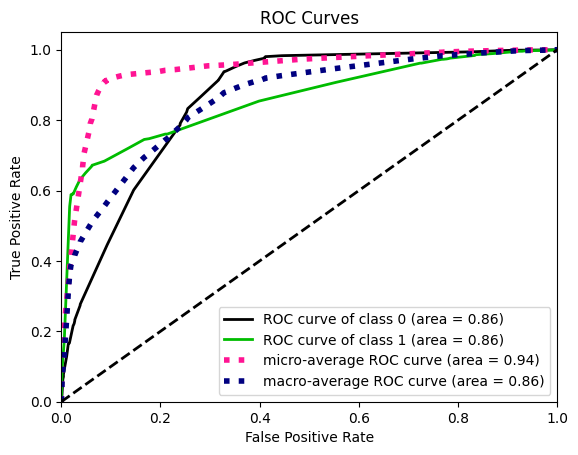

In [17]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, ypred_p)
plt.show()

# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
tree = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train: features, y_train: labels

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9167680657429038


In [10]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)
DT.fit(X_train,y_train)
DT_pred=DT.predict(X_valid)

In [11]:
print('Accuracy: ' ,round(accuracy_score(y_valid,DT_pred),2))
print('ROC AUC : ' ,round(roc_auc_score(y_valid,DT_pred),2))

Accuracy:  0.91
ROC AUC :  0.79


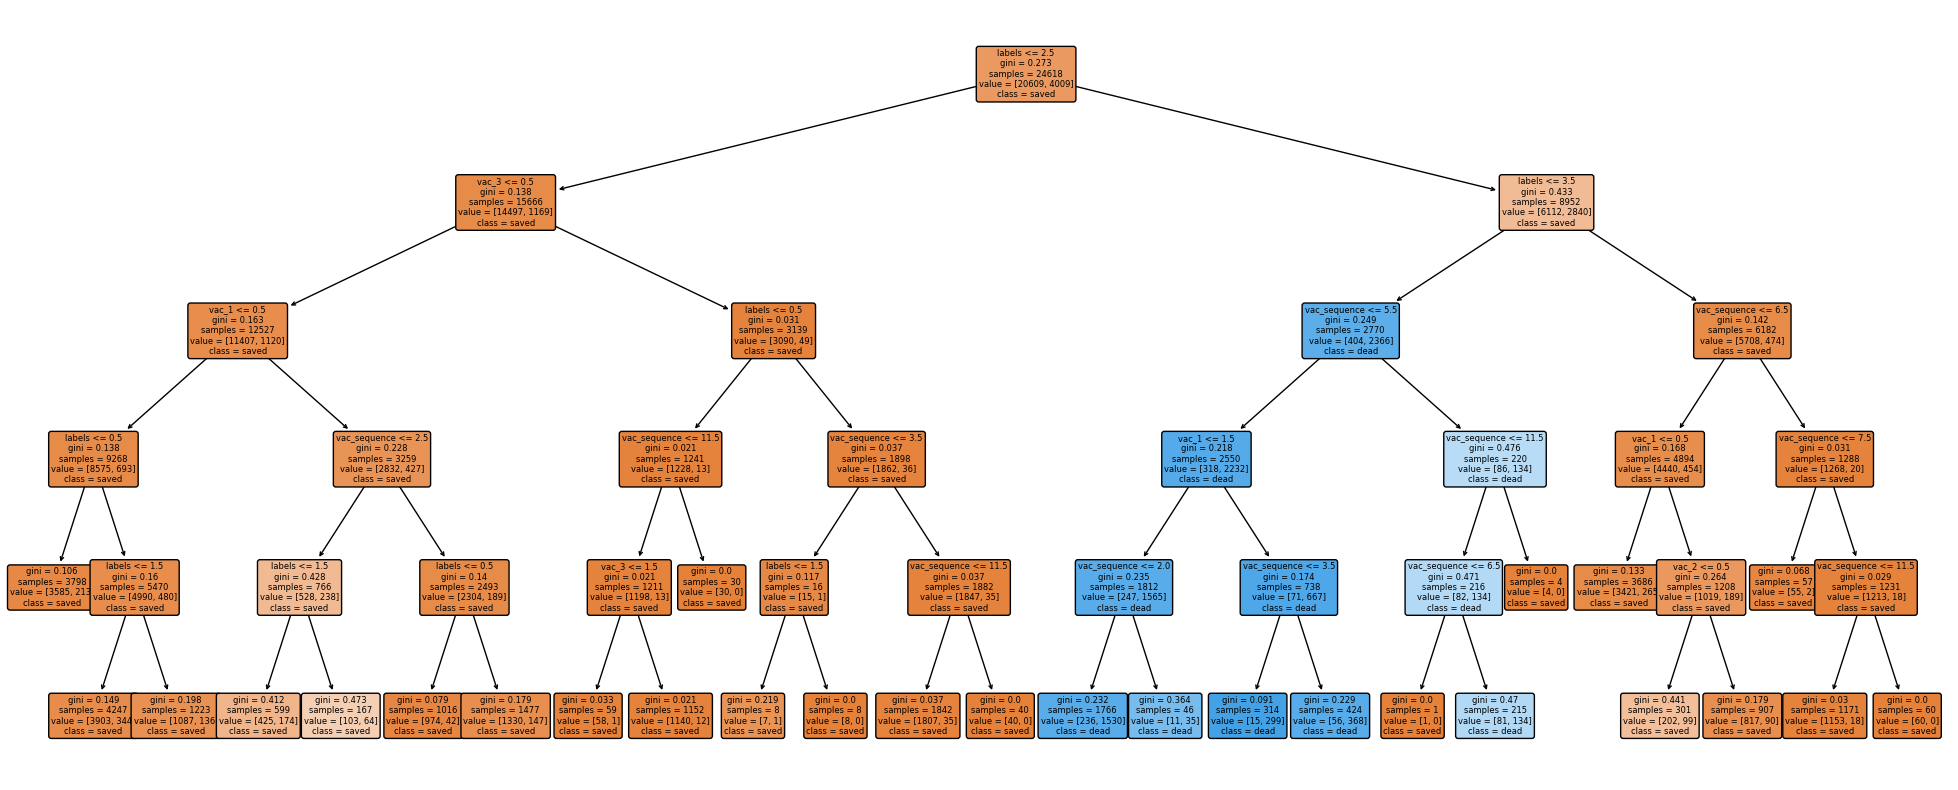

In [12]:
class_names = ['saved', 'dead']  # Update with your class labels

plt.figure(figsize=(25, 10))
plot_tree(
    DT,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=class_names,
    node_ids=False,
    proportion=False,
    label='all',
    impurity=True,
    fontsize=6,
    
#     special_characters=True
)
plt.show()

In [13]:
from dtreeviz.trees import *

In [14]:
from sklearn import tree
import dtreeviz
fig = plt.figure(figsize=(25,20))
viz = dtreeviz.model(DT,
               X_train,
               y_train,
               target_name='dead or saved',
               feature_names=X_train.columns,
               class_names=['saved', 'dead'])
v = viz.view() 
v.show()        

<Figure size 2500x2000 with 0 Axes>

In [15]:
v.save("/tmp/iris.svg")

# XGBOOST

In [24]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc', 
                           n_jobs=-1, verbose=1, refit=True)
grid_search.fit(X_train, y_train)

# Get the best parameter values and the corresponding score
best_params = grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [25]:
best_params

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [9]:
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators=100)
xgb.fit(X_train,y_train)
xg_pred=xgb.predict(X_valid)

In [13]:
print('Accuracy: ' ,round(accuracy_score(y_valid,xg_pred),2))
print('ROC AUC : ' ,round(roc_auc_score(y_valid,xg_pred),2))

Accuracy:  0.91
ROC AUC :  0.79


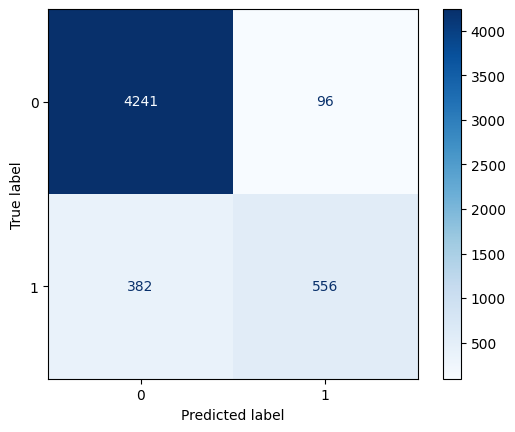

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_valid, y_valid,cmap='Blues')  
plt.show()

>1, train: 0.909, test: 0.912
>2, train: 0.909, test: 0.912
>3, train: 0.909, test: 0.912
>4, train: 0.909, test: 0.912
>5, train: 0.909, test: 0.912
>6, train: 0.909, test: 0.912
>7, train: 0.909, test: 0.912
>8, train: 0.909, test: 0.912
>9, train: 0.909, test: 0.912
>10, train: 0.909, test: 0.912
>11, train: 0.909, test: 0.912
>12, train: 0.909, test: 0.912
>13, train: 0.909, test: 0.912
>14, train: 0.909, test: 0.912
>15, train: 0.909, test: 0.912
>16, train: 0.909, test: 0.912
>17, train: 0.909, test: 0.912
>18, train: 0.909, test: 0.912
>19, train: 0.909, test: 0.912
>20, train: 0.909, test: 0.912


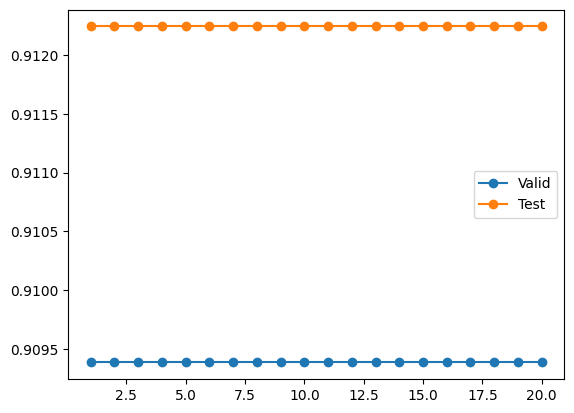

In [15]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    train_yhat = xgb.predict(X_valid)
    train_acc = accuracy_score(y_valid, train_yhat)
    train_scores.append(train_acc)
     # evaluate on the test dataset

    test_yhat = xgb.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
     # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Valid')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

>1, train: 0.785, test: 0.784
>2, train: 0.785, test: 0.784
>3, train: 0.785, test: 0.784
>4, train: 0.785, test: 0.784
>5, train: 0.785, test: 0.784
>6, train: 0.785, test: 0.784
>7, train: 0.785, test: 0.784
>8, train: 0.785, test: 0.784
>9, train: 0.785, test: 0.784
>10, train: 0.785, test: 0.784
>11, train: 0.785, test: 0.784
>12, train: 0.785, test: 0.784
>13, train: 0.785, test: 0.784
>14, train: 0.785, test: 0.784
>15, train: 0.785, test: 0.784
>16, train: 0.785, test: 0.784
>17, train: 0.785, test: 0.784
>18, train: 0.785, test: 0.784
>19, train: 0.785, test: 0.784
>20, train: 0.785, test: 0.784


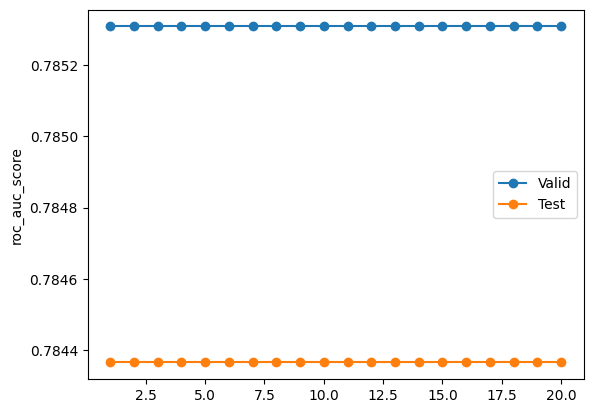

In [16]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    train_yhat = xgb.predict(X_valid)
    train_acc = roc_auc_score(y_valid, train_yhat)
    train_scores.append(train_acc)
     # evaluate on the test dataset

    test_yhat = xgb.predict(X_test)
    test_acc = roc_auc_score(y_test, test_yhat)
    test_scores.append(test_acc)
     # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Valid')
plt.plot(values, test_scores, '-o', label='Test')
plt.ylabel('roc_auc_score')
plt.legend()
plt.show()

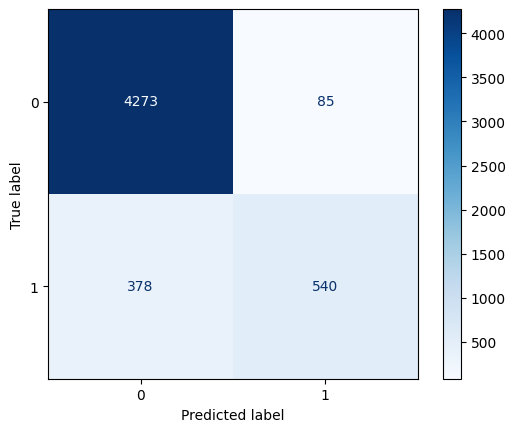

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test,cmap='Blues')  
plt.show()

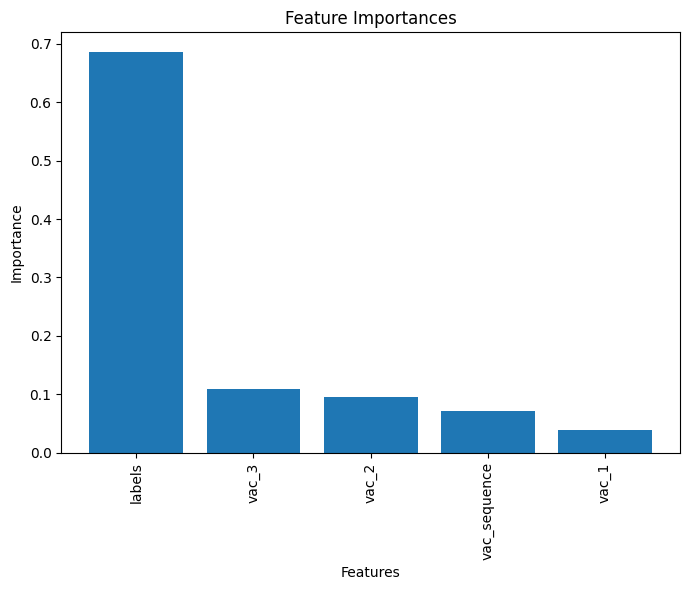

In [18]:
importances = xgb.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace 'data' with your dataset or provide feature names separately

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances as a bar plot
plt.figure(figsize=(7, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

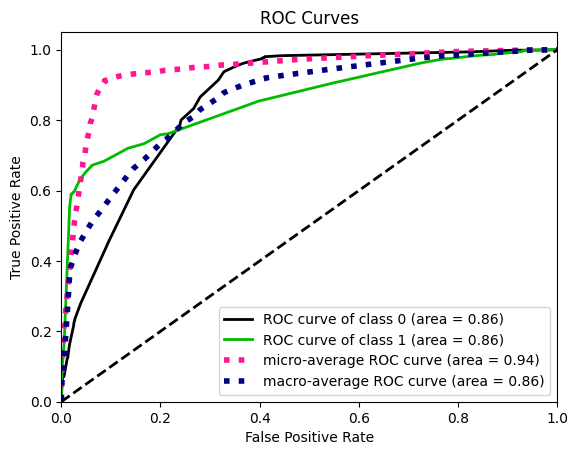

In [19]:
xgbpred_p=xgb.predict_proba(X_test)
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, xgbpred_p)
plt.show()

# LGBM

In [75]:
param_grid = {
    'learning_rate': [0.1, 0.01,0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500,1000],
    'num_leaves': [10,25, 31, 50]
}

# Define the LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the ROC AUC score of the best estimator
roc_auc = roc_auc_score(y_test, y_pred)
print("Best Score:", best_score)
print("Best Estimator:", best_estimator)
print("ROC AUC:", roc_auc)

Best Score: 0.8648237320580486
Best Estimator: LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000,
               num_leaves=10)
ROC AUC: 0.7843654671597874


In [77]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 10}

In [20]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(learning_rate= 0.01, max_depth= 5, n_estimators= 1000, num_leaves= 10)
lgb_clf.fit(X_train, y_train)
lgbm_pred = lgb_clf.predict(X_valid)


In [21]:
print('Accuracy: ' ,round(accuracy_score(y_valid,lgbm_pred),2))
print('ROC AUC : ' ,round(roc_auc_score(y_valid,lgbm_pred),2))

Accuracy:  0.91
ROC AUC :  0.78


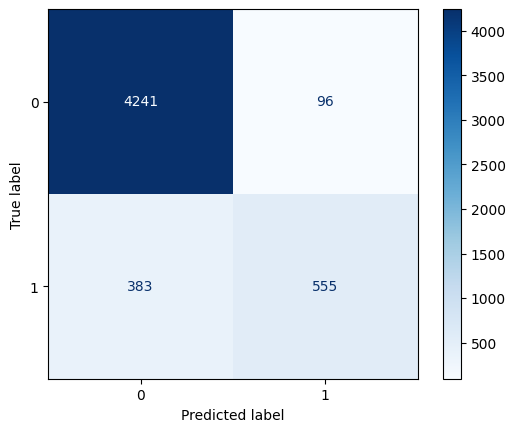

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgb_clf, X_valid, y_valid,cmap='Blues')  
plt.show()

>1, train: 0.785, test: 0.784
>2, train: 0.785, test: 0.784
>3, train: 0.785, test: 0.784
>4, train: 0.785, test: 0.784
>5, train: 0.785, test: 0.784
>6, train: 0.785, test: 0.784
>7, train: 0.785, test: 0.784
>8, train: 0.785, test: 0.784
>9, train: 0.785, test: 0.784
>10, train: 0.785, test: 0.784
>11, train: 0.785, test: 0.784
>12, train: 0.785, test: 0.784
>13, train: 0.785, test: 0.784
>14, train: 0.785, test: 0.784
>15, train: 0.785, test: 0.784
>16, train: 0.785, test: 0.784
>17, train: 0.785, test: 0.784
>18, train: 0.785, test: 0.784
>19, train: 0.785, test: 0.784
>20, train: 0.785, test: 0.784


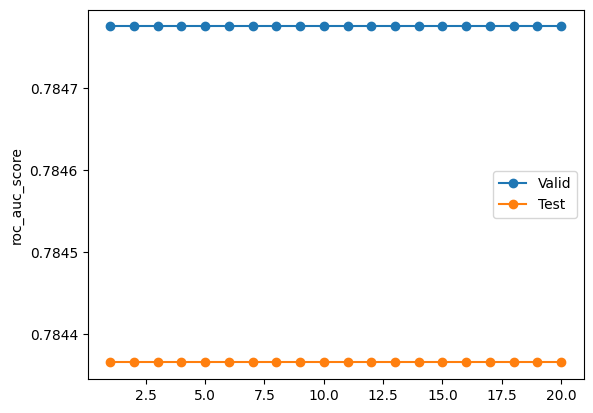

In [23]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    train_yhat = lgb_clf.predict(X_valid)
    train_acc = roc_auc_score(y_valid, train_yhat)
    train_scores.append(train_acc)
     # evaluate on the test dataset

    test_yhat = lgb_clf.predict(X_test)
    test_acc = roc_auc_score(y_test, test_yhat)
    test_scores.append(test_acc)
     # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Valid')
plt.plot(values, test_scores, '-o', label='Test')
plt.ylabel('roc_auc_score')
plt.legend()
plt.show()

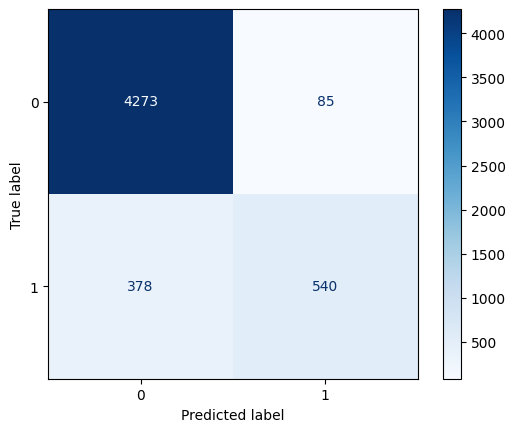

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgb_clf, X_test, y_test,cmap='Blues')  
plt.show()

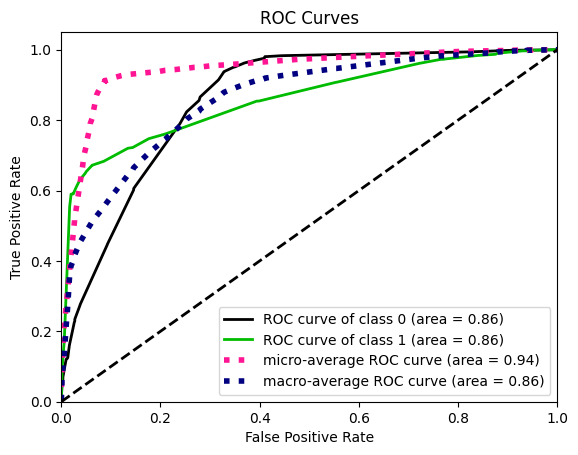

In [25]:
lgb_pred=lgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, lgb_pred)
plt.show()

# KNN

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# تعریف فضای پارامترها برای گرید سرچ
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # مقادیر ممکن برای K

# ایجاد شیء گرید سرچ با استفاده از مدل KNN و فضای پارامترها
grid_search = GridSearchCV(knn, param_grid, scoring='roc_auc')

# آموزش مدل با استفاده از داده‌های آموزش
grid_search.fit(X_train, y_train)

# مقدار بهینه برای K
best_k = grid_search.best_params_['n_neighbors']

# عملکرد مدل با مقدار بهینه
best_score = grid_search.best_score_

# نتایج
print("Best K:", best_k)
print("Best Score:", best_score)

Best K: 7
Best Score: 0.8216040777146476


In [39]:
grid_search.best_params_

{'n_neighbors': 7}

In [29]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knpred=knn.predict(X_valid)

In [30]:
print('Accuracy: ' ,round(accuracy_score(y_valid,knpred),2))
print('ROC AUC : ' ,round(roc_auc_score(y_valid,knpred),2))

Accuracy:  0.91
ROC AUC :  0.79


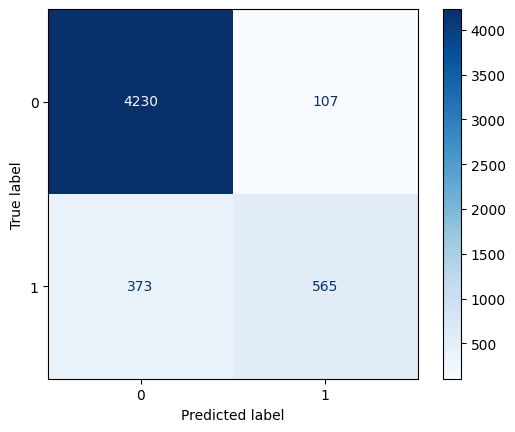

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_valid, y_valid,cmap='Blues')  
plt.show()

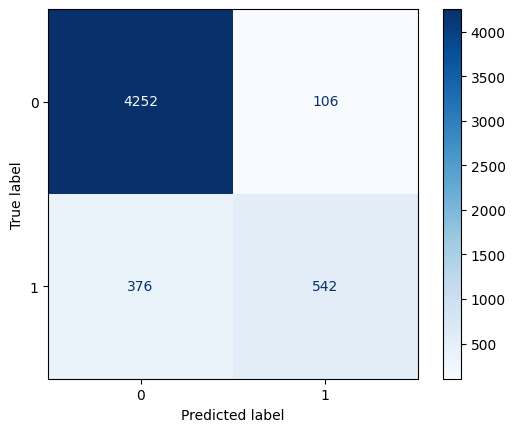

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test,cmap='Blues')  
plt.show()

# Logestic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_pred=LR.predict(X_valid)

In [34]:
print('Accuracy: ' ,round(accuracy_score(y_valid,LR_pred),2))
print('ROC AUC : ' ,round(roc_auc_score(y_valid,LR_pred),2))

Accuracy:  0.83
ROC AUC :  0.54


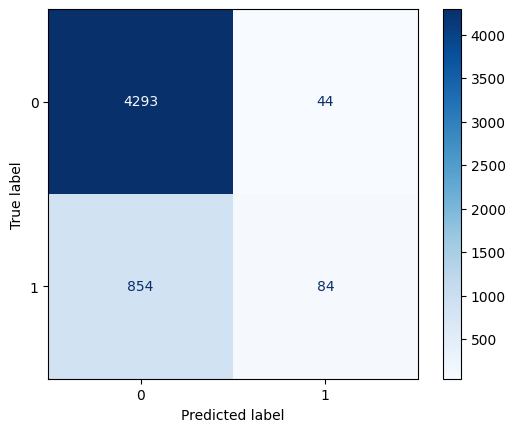

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_valid, y_valid,cmap='Blues')  
plt.show()

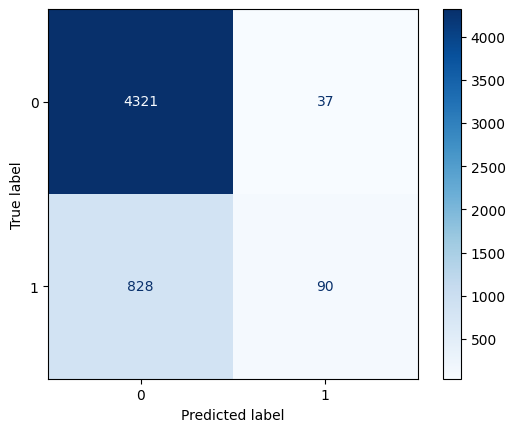

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test,cmap='Blues')  
plt.show()

>1, train: 0.540, test: 0.545
>2, train: 0.540, test: 0.545
>3, train: 0.540, test: 0.545
>4, train: 0.540, test: 0.545
>5, train: 0.540, test: 0.545
>6, train: 0.540, test: 0.545
>7, train: 0.540, test: 0.545
>8, train: 0.540, test: 0.545
>9, train: 0.540, test: 0.545
>10, train: 0.540, test: 0.545
>11, train: 0.540, test: 0.545
>12, train: 0.540, test: 0.545
>13, train: 0.540, test: 0.545
>14, train: 0.540, test: 0.545
>15, train: 0.540, test: 0.545
>16, train: 0.540, test: 0.545
>17, train: 0.540, test: 0.545
>18, train: 0.540, test: 0.545
>19, train: 0.540, test: 0.545
>20, train: 0.540, test: 0.545


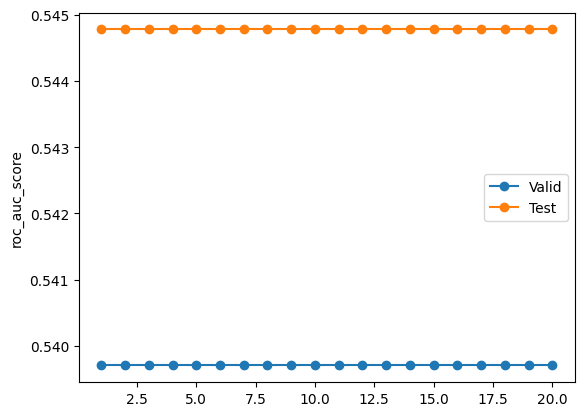

In [37]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    train_yhat = LR.predict(X_valid)
    train_acc = roc_auc_score(y_valid, train_yhat)
    train_scores.append(train_acc)
     # evaluate on the test dataset

    test_yhat = LR.predict(X_test)
    test_acc = roc_auc_score(y_test, test_yhat)
    test_scores.append(test_acc)
     # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Valid')
plt.plot(values, test_scores, '-o', label='Test')
plt.ylabel('roc_auc_score')
plt.legend()
plt.show()

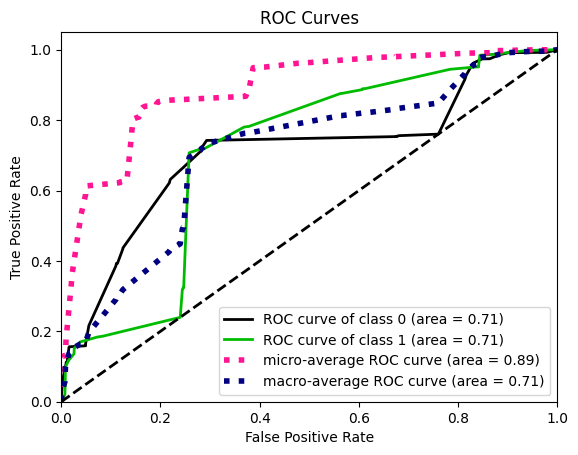

In [38]:
LR_predb=LR.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, LR_predb)
plt.show()

In [39]:
LR.coef_

array([[ 0.3587711 ,  0.90395165, -0.55227401, -0.51101997, -0.11419307]])

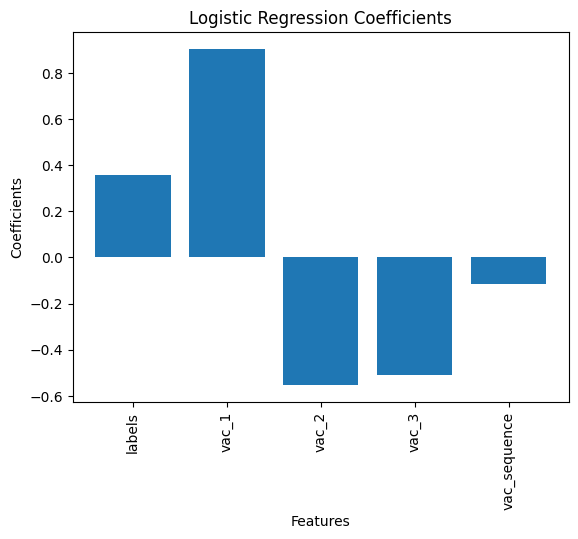

In [40]:
coefficients = LR.coef_[0]

# نام متغیرها
feature_names = X_train.columns  # نام متغیرها را در این قسمت قرار دهید

# تعداد متغیرها
num_features = len(feature_names)

# رسم نمودار میله‌ای از ضرایب
plt.bar(range(num_features), coefficients)
plt.xticks(range(num_features), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.show()

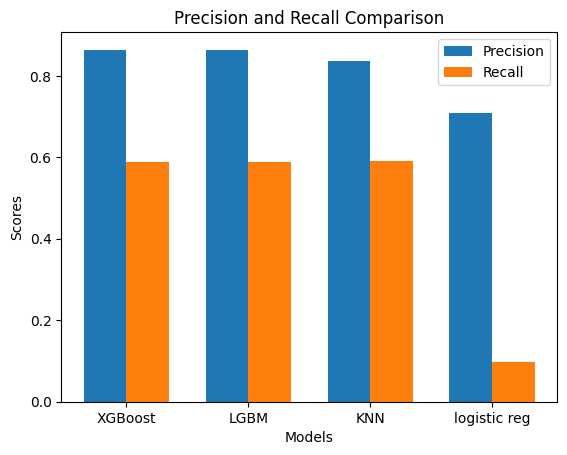

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# True labels (ground truth)
y_pred_model1 = xgb.predict(X_test)
y_pred_model2 = lgb_clf.predict(X_test)
y_pred_model3 = knn.predict(X_test)
y_pred_model4 = LR.predict(X_test)
# Calculate precision scores for each model
precision_model1 = precision_score(y_test, y_pred_model1)
precision_model2 = precision_score(y_test, y_pred_model2)
precision_model3 = precision_score(y_test, y_pred_model3)
precision_model4 = precision_score(y_test, y_pred_model4)

# Calculate recall scores for each model
recall_model1 = recall_score(y_test, y_pred_model1)
recall_model2 = recall_score(y_test, y_pred_model2)
recall_model3 = recall_score(y_test, y_pred_model3)
recall_model4 = recall_score(y_test, y_pred_model4)

# Precision and recall values for the four models
precision_values = [precision_model1, precision_model2, precision_model3, precision_model4]
recall_values = [recall_model1, recall_model2, recall_model3, recall_model4]

# Model names
model_names = ['XGBoost', 'LGBM', 'KNN', 'logistic reg']

# Bar chart
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, precision_values, width, label='Precision')
rects2 = ax.bar(x + width, recall_values, width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x + width/2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


In [43]:
print(recall_model1)
print(recall_model2)
print(recall_model3)
print(recall_model4)

0.5882352941176471
0.5882352941176471
0.5904139433551199
0.09803921568627451


In [44]:
print(precision_model1)
print(precision_model2)
print(precision_model3)
print(precision_model4)

0.864
0.864
0.8364197530864198
0.7086614173228346


In [18]:
data.to_csv('data_class.csv',encoding='utf-8-sig',index=False)